## Linear Regression

#### Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

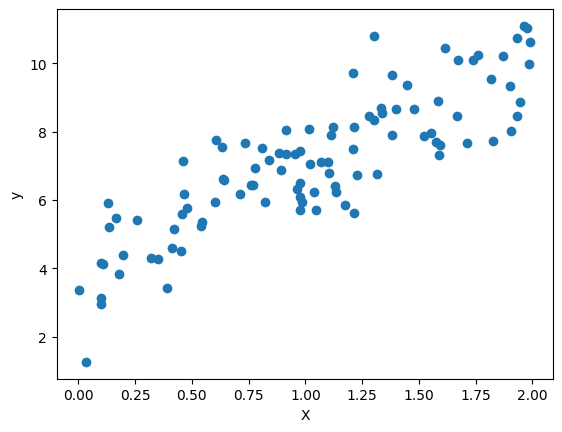

In [3]:
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
X_b = np.c_[np.ones_like(X), X]

In [5]:
#using normal equation to find the best theta to minimize the cost function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.95792074],
       [3.04662726]])

In [6]:
X_ = np.array([[0], [2]])
X_ = np.c_[np.ones_like(X_), X_].T
X_.shape

(2, 2)

In [7]:
y_hat = np.matmul(theta_best.T, X_)

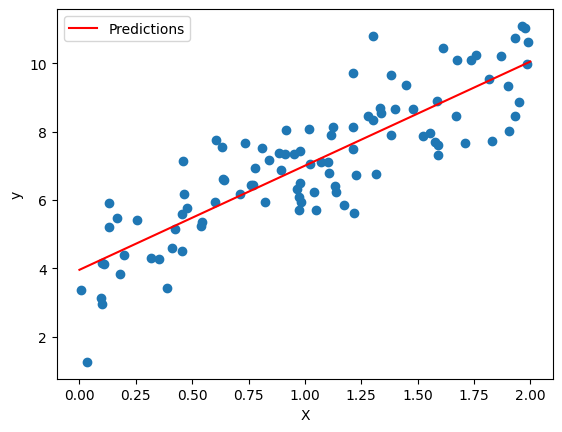

In [8]:
plt.scatter(x=X, y=y)
plt.plot([0,2], y_hat.flatten(), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Linear Regression using scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression(n_jobs=-1)

In [11]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95792074]), array([[3.04662726]]))

In [12]:
lin_reg.predict(np.array([[0],[2]]))

array([[ 3.95792074],
       [10.05117526]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.95792074],
       [3.04662726]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[3.95792074],
       [3.04662726]])

#### Gradient Descent

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [17]:
theta = np.random.randn(2,1)

In [19]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [20]:
theta

array([[3.95792074],
       [3.04662726]])

In [21]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameters

In [22]:
def learning_schedule(t):
    return t0 / (t +t1)

In [23]:
theta = np.random.randn(2,1)

In [26]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [27]:
theta

array([[3.91790308, 3.9164415 ],
       [3.06525707, 3.06643064]])

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89730435]), array([2.97218648]))